<a href="https://colab.research.google.com/github/sanjabh11/Projects/blob/master/Ship_AV5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Resnet 50 with 99.2 accuracy but 90.34 score
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
import fastai
fastai.__version__

'1.0.52'

We import all the necessary packages. We are going to work with the [fastai V1 library](http://www.fast.ai/2018/10/02/fastai-ai/) which sits on top of [Pytorch 1.0](https://hackernoon.com/pytorch-1-0-468332ba5163). The fastai library provides many useful functions that enable us to quickly and easily build neural networks and train our models.

In [0]:
from fastai.vision import *
#from fastai.metrics import error_rate

If you're using a computer with an unusually small GPU, you may get an out of memory error when running this notebook. If this happens, click Kernel->Restart, uncomment the 2nd line below to use a smaller *batch size* (you'll learn all about what this means during the course), and try again.

In [0]:
#bs = 64
bs = 512   # uncomment this line if you run out of memory even after clicking Kernel->Restart

In [0]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive/


## Looking at the data

In [0]:
path = "/content/gdrive/My Drive/Ships"
path

'/content/gdrive/My Drive/Ships'

In [0]:
tfms = get_transforms(flip_vert=False, max_lighting=0.2, max_zoom=1.1, max_warp=0.)

In [0]:
#File based
np.random.seed(42)
data = ImageDataBunch.from_csv(path, 
                        folder='images',
                        csv_labels='train.csv',
                        fn_col=0, label_col=1,
                        ds_tfms=get_transforms(tfms),                       
                        size=100, valid_pct=0.2)

In [0]:
data.show_batch(rows=4, figsize=(6,7))

In [0]:
  data.classes, data.c, len(data.train_ds), len(data.valid_ds)

([1, 2, 3, 4, 5], 5, 5002, 1250)

In [0]:
len(data.train_ds)

5002

## Training: resnet34

In [0]:
fbeta = FBeta(average='weighted')

In [0]:
#f_score = partial(fbeta, thresh=0.4)
#learn = cnn_learner(data, arch, metrics=[acc_02, f_score])
learn = cnn_learner(data, models.resnet50, metrics=[accuracy, fbeta])

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:03<00:00, 26824715.04it/s]


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


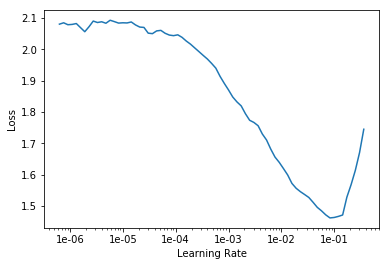

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(10, max_lr=slice(1e-03,1e-01))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.942829,0.717618,0.745600,0.738112,14:49
1,0.829099,0.924748,0.710400,0.698500,00:29
2,0.959637,1.932027,0.684000,0.659708,00:28
3,0.816239,0.787471,0.780000,0.776467,00:28
4,0.675275,0.616677,0.815200,0.814047,00:28
5,0.511914,0.367941,0.864000,0.860926,00:28
6,0.427254,0.322882,0.877600,0.877940,00:28
7,0.329987,0.391470,0.874400,0.874108,00:28
8,0.284284,0.297494,0.896000,0.896301,00:28
9,0.251696,0.281250,0.896800,0.896771,00:28


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


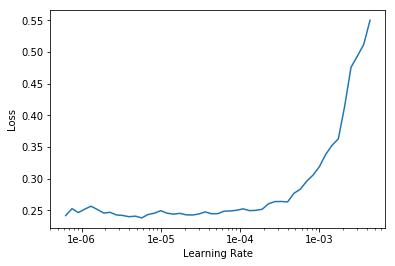

In [0]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(20, max_lr=slice(1e-06,1e-05))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.230885,0.280575,0.897600,0.897500,00:29
1,0.234011,0.281783,0.901600,0.901669,00:29
2,0.225618,0.277428,0.896800,0.896664,00:29
3,0.232305,0.276840,0.898400,0.898387,00:29
4,0.222801,0.277685,0.904000,0.904149,00:29


In [0]:
learn.save('stage1-av5')

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_csv(path, 
                        folder='images',
                        csv_labels='train.csv',
                        fn_col=0, label_col=1,
                        ds_tfms=get_transforms(tfms),                       
                        size=124, valid_pct=0.1)

In [0]:
learn.data = data
data.train_ds[0][0].shape

torch.Size([3, 124, 124])

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


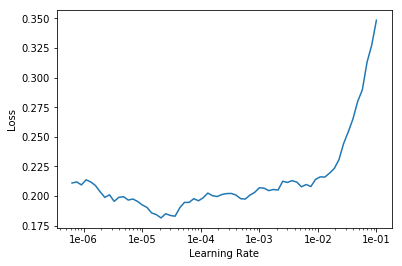

In [0]:
learn.freeze()
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(10, max_lr=slice(1e-06,4e-05))

epoch,train_loss,valid_loss,accuracy,time
0,0.193785,0.261457,0.907200,00:34
1,0.205234,0.260599,0.913600,00:34
2,0.190741,0.257435,0.908800,00:33
3,0.186956,0.257930,0.907200,00:33
4,0.200505,0.258613,0.908800,00:33
5,0.190763,0.267126,0.904000,00:33
6,0.187949,0.259757,0.908800,00:32
7,0.197679,0.261311,0.910400,00:33
8,0.187483,0.258229,0.905600,00:33
9,0.180358,0.255176,0.907200,00:33


In [0]:
learn.unfreeze()
learn.fit_one_cycle(5, max_lr=slice(1e-06,1e-05))

epoch,train_loss,valid_loss,accuracy,time
0,0.184525,0.258966,0.904000,00:34
1,0.176677,0.247188,0.908800,00:34
2,0.179023,0.241564,0.904000,00:34
3,0.168744,0.244605,0.908800,00:34
4,0.158507,0.242772,0.905600,00:34


In [0]:
learn.save('stage2-av5')

In [0]:
tfms1 = get_transforms(flip_vert=True, max_lighting=0.4, max_zoom=1.2, max_warp=0.)

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_csv(path, 
                        folder='images',
                        csv_labels='train.csv',
                        fn_col=0, label_col=1,
                        ds_tfms=get_transforms(tfms1),                       
                        size=200, valid_pct=0.2)

In [0]:
learn.data = data
data.train_ds[0][0].shape

torch.Size([3, 200, 200])

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


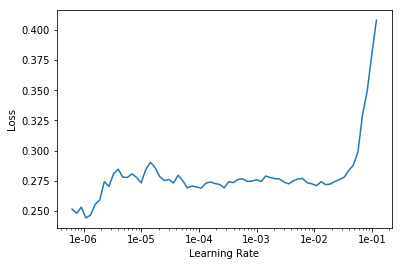

In [0]:
learn.freeze()
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(5, max_lr=slice(2e-04,2e-02))

epoch,train_loss,valid_loss,accuracy,time
0,0.253323,0.456101,0.910400,00:55
1,0.233838,0.254156,0.909600,00:54
2,0.195906,0.205176,0.932000,00:54
3,0.161561,0.236444,0.934400,00:55
4,0.116431,0.244111,0.934400,00:54


In [0]:
learn.save('stage31-av5')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


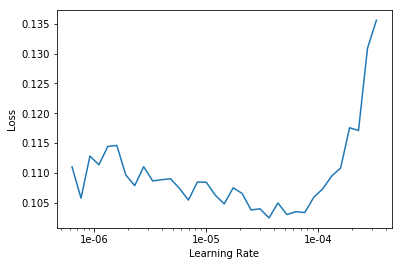

In [0]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [0]:

learn.fit_one_cycle(5, max_lr=slice(1e-04,1e-03))

epoch,train_loss,valid_loss,accuracy,time
0,0.224322,511.588837,0.698400,00:59
1,0.280613,1.309823,0.904800,00:59
2,0.217039,0.263652,0.918400,00:59
3,0.138288,0.167618,0.937600,00:59
4,0.091108,0.156517,0.945600,00:59


In [0]:
learn.save('stage33-av5')

#Stage4

In [0]:
learn.load('stage33-av5')

In [0]:
tfms2 = get_transforms(flip_vert=False, max_lighting=0.4, max_zoom=1.4, max_warp=0.)

In [0]:
tfms2 = get_transforms(flip_vert=False, max_lighting=0.4, max_zoom=1.4, max_warp=0.)
data = ImageDataBunch.from_csv(path, 
                        folder='images',
                        csv_labels='train.csv',
                        
                        ds_tfms=get_transforms(tfms2),                       
                        size=224, valid_pct=0.2)
learn.data = data
data.train_ds[0][0].shape

In [0]:
learn.data = data
data.train_ds[0][0].shape

torch.Size([3, 224, 224])

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


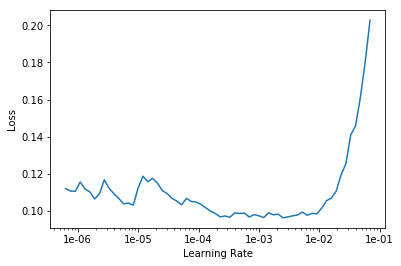

In [0]:
learn.freeze()
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(10, max_lr=slice(1e-05,1e-02))

In [0]:
learn.save('stage41-av5')

In [0]:
learn.load('stage-4')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


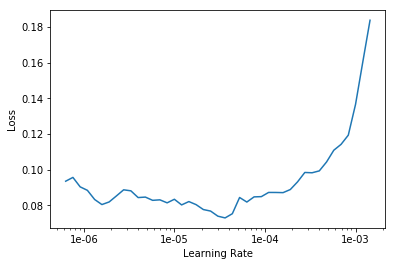

In [0]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(10, max_lr=slice(7e-07,5e-05))

epoch,train_loss,valid_loss,accuracy,time
0,0.080530,0.209215,0.973600,01:10
1,0.073124,0.130877,0.978400,01:10
2,0.073818,0.204782,0.981600,01:10
3,0.071850,0.926418,0.977600,01:10
4,0.070334,0.053512,0.982400,01:10
5,0.068849,0.697207,0.980000,01:09
6,0.058721,0.095478,0.981600,01:10
7,0.062953,0.052944,0.983200,01:09
8,0.055421,0.054394,0.983200,01:09
9,0.054719,0.185964,0.979200,01:10


In [0]:
learn.save('stage42-av5')

In [0]:
learn.save('stage42-av5')

In [0]:
tfms3 = get_transforms(flip_vert=False, max_lighting=0.5, max_zoom=1.8, max_warp=0.)
data = ImageDataBunch.from_csv(path, 
                        folder='images',
                        csv_labels='train.csv',
                        
                        ds_tfms=get_transforms(tfms3),                       
                        size=256, valid_pct=0.2)
learn.data = data
data.train_ds[0][0].shape

torch.Size([3, 256, 256])

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


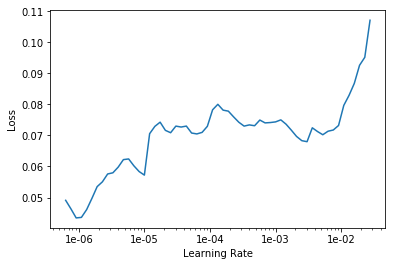

In [0]:
learn.freeze()
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(5, max_lr=slice(3e-07,1e-06))

epoch,train_loss,valid_loss,accuracy,time
0,0.082173,0.026366,0.991200,01:19
1,0.083153,0.024389,0.990400,01:18
2,0.075386,0.025395,0.990400,01:17
3,0.075708,0.026542,0.990400,01:18
4,0.074909,0.024774,0.991200,01:17


In [0]:
learn.save('stage51-av5')

In [0]:
learn.load('stage51-av5')

In [0]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(10, max_lr=slice(8e-07,5e-06))

epoch,train_loss,valid_loss,accuracy,time
0,0.075045,0.024226,0.991200,01:23
1,0.074758,0.026387,0.990400,01:24
2,0.073546,0.024536,0.992000,01:23
3,0.071874,0.024021,0.992000,01:24
4,0.063532,0.024389,0.991200,01:23
5,0.059442,0.023839,0.991200,01:24
6,0.063795,0.023444,0.992000,01:23
7,0.059002,0.024833,0.990400,01:24
8,0.059280,0.024125,0.992000,01:23
9,0.061259,0.025398,0.991200,01:24


In [0]:
learn.save('stage52-av5')

In [0]:
learn.load('stage52-av5')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


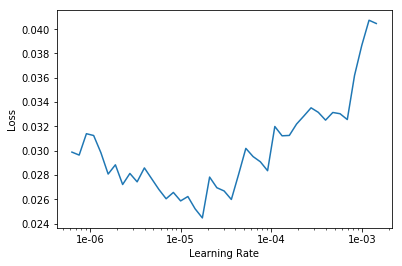

In [0]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(5, max_lr=slice(1e-06,2e-05))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.029600,0.024156,0.992800,0.992794,07:27
1,0.028696,0.152768,0.989600,0.989595,02:15
2,0.031541,0.453472,0.991200,0.991188,02:14
3,0.026578,0.119038,0.988800,0.988798,02:15
4,0.022297,0.022982,0.994400,0.994390,02:14


In [0]:
learn.save('stage5F-av5')

In [0]:
learn.load('stage53-av5')

#another cycle

In [0]:
tfms4 = get_transforms(flip_vert=False, max_lighting=0.9, max_zoom=1.2, max_warp=0.)
data = ImageDataBunch.from_csv(path, 
                        folder='images',
                        csv_labels='train.csv',
                        
                        ds_tfms=get_transforms(tfms4),                       
                        size=300, valid_pct=0.2)
learn.data = data
data.train_ds[0][0].shape

torch.Size([3, 300, 300])

In [0]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.034286,0.014284,0.994400,0.994401,01:42
1,0.033480,0.013002,0.996000,0.996000,01:40
2,0.035680,0.013842,0.995200,0.995201,01:39


In [0]:
learn.save('stage54-av5')

In [0]:
learn.load('stage54-av5')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


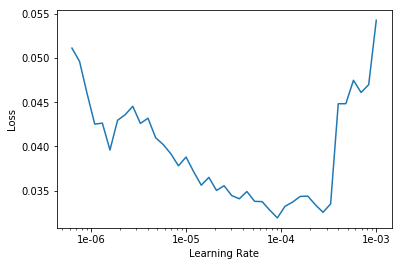

In [0]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(2, max_lr=slice(1e-05,1e-04))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.037071,0.012431,0.996000,0.996000,01:55
1,0.034292,0.039915,0.996000,0.995998,01:53


In [0]:
learn.save('stage55-av5')

In [0]:
learn.export()

## Results_Previous

Let's see what results we have got. 

We will first see which were the categories that the model most confused with one another. We will try to see if what the model predicted was reasonable or not. In this case the mistakes look reasonable (none of the mistakes seems obviously naive). This is an indicator that our classifier is working correctly. 

Furthermore, when we plot the confusion matrix, we can see that the distribution is heavily skewed: the model makes the same mistakes over and over again but it rarely confuses other categories. This suggests that it just finds it difficult to distinguish some specific categories between each other; this is normal behaviour.

In [0]:
#interp = ClassificationInterpretation.from_learner(learn)
#interp = ClassificationInterpretation.from_learner(learn, ds_type=DatasetType.Valid)
interp = ClassificationInterpretation.from_learner(learn, ds_type=DatasetType.Train)

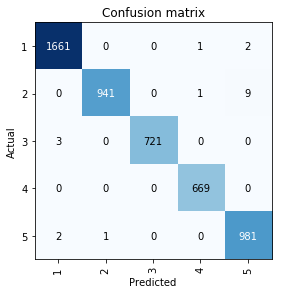

In [0]:
#++interp.plot_confusion_matrix(figsize=(12,12), dpi=60)
interp.plot_confusion_matrix()

In [0]:
interp.most_confused(min_val=3)

[(5, 1, 7), (1, 5, 5)]

In [0]:
interp.plot_top_losses(9, figsize=(7,6))

#Investigate more

In [0]:
interp.plot_top_losses(15)

In [0]:
# class-to-index mapping:
learn.data.train_ds.y.c2i

{1: 0, 2: 1, 3: 2, 4: 3, 5: 4}

In [0]:
plot_top_losses_heatmap(10,learn,True)

In [0]:
log_probs, y = learn.TTA(is_test=True)

In [0]:
losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

True

In [0]:
test = ImageList.from_csv(path, 'test.csv', folder='images')
len(test)

2680

In [0]:
learn.data.test_ds.x, learn.data.test_ds.y

In [0]:
learn.model.eval()

In [0]:
log_preds, y = learn.to_fp32().TTA(ds_type=DatasetType.Test)
predIdxs = np.argmax(log_preds.numpy(), axis=1)

In [0]:
learn = load_learner(path, test=test)
preds, _ = learn.get_preds(ds_type=DatasetType.Test)

In [0]:
preds

In [0]:
labels = np.argmax(preds, 1)
labels[:40]

tensor([3, 3, 3, 1, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 1, 1, 3, 1, 1, 3, 1, 3, 1, 3,
        3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [0]:
df_test= pd.read_csv('/content/gdrive/My Drive/Ships/test.csv')

In [0]:
#sub2-->96.738 on LB (42 rank)
res_df = pd.DataFrame({'image': df_test['image'], 'category': labels})
res_df.to_csv('subf3.csv', index=False)

In [0]:
losslist = losses.tolist()
losslist

In [0]:
idxs

tensor([ 7810,     8,  5613,  ...,  8409, 10225,  9998])

In [0]:
preds = learn.pred_batch()

In [0]:
type(preds), preds.shape

(torch.Tensor, torch.Size([2680, 5]))

In [0]:
preds[:12]

tensor([[1.6207e-08, 2.3546e-07, 2.6427e-08, 1.0000e+00, 2.6262e-06],
        [1.1832e-07, 2.4962e-08, 1.7037e-06, 1.0000e+00, 1.2341e-07],
        [1.9594e-06, 1.5393e-05, 1.3220e-06, 9.9998e-01, 2.6461e-06],
        [2.3770e-09, 1.0000e+00, 5.7482e-08, 8.2915e-07, 9.2834e-08],
        [1.7800e-04, 5.7585e-04, 1.9486e-03, 9.9726e-01, 3.7088e-05],
        [4.8373e-08, 1.7057e-06, 4.8009e-07, 1.0000e+00, 7.9898e-08],
        [1.6509e-08, 2.2434e-08, 2.9541e-07, 9.9980e-01, 1.9974e-04],
        [7.8491e-03, 4.3364e-01, 1.1243e-03, 6.0561e-04, 5.5678e-01],
        [9.9339e-09, 1.0000e+00, 1.5550e-08, 1.1373e-06, 2.5520e-08],
        [4.8453e-01, 2.5062e-03, 1.2596e-03, 5.1159e-01, 1.1685e-04],
        [4.7292e-07, 1.5390e-06, 1.0983e-05, 9.9997e-01, 1.2532e-05],
        [2.5080e-08, 9.7714e-07, 1.0571e-06, 1.0000e+00, 1.4950e-06]])

In [0]:
preds.dim()

2

In [0]:
probs = np.exp(log_preds) / np.exp(log_preds).sum(1)[:,None]

In [0]:
probs = np.exp(log_preds)
probs, probs.shape

In [0]:
preds = np.argmax(log_preds, axis=1)
preds, preds.shape

In [0]:
learn = load_learner(path, test=test)
preds, _ = learn.get_preds(ds_type=DatasetType.Test)

In [0]:
#To get predictions on the entire training dataset
#preds_train = learn.get_preds(ds_type = DatasetType.Train, ordered=True)
preds_test = learn.get_preds(ds_type=DatasetType.Test)
#preds_train = learn.get_preds(ds_type=Dat)
#predstrn,y = learn.get_preds(ds_type=DatasetType.Fix)
#train_preds, train_ys = learn.TTA(ds_type=DatasetType.Fix)

In [0]:
type(test_preds), train_preds.shape,  train_ys.shape

(torch.Tensor, torch.Size([10498, 6]), torch.Size([10498]))

In [0]:
train_preds, train_ys

(tensor([[1.4061e-04, 1.5408e-03, 1.7946e-03, 2.3454e-02, 8.0145e-01, 1.7162e-01],
         [1.5471e-03, 1.1047e-03, 7.2875e-04, 5.3874e-03, 9.4217e-01, 4.9060e-02],
         [1.3402e-06, 1.3434e-05, 3.1436e-06, 3.2179e-03, 9.9014e-01, 6.6281e-03],
         ...,
         [1.6057e-05, 1.6548e-03, 8.9857e-04, 9.0788e-01, 6.3966e-02, 2.5588e-02],
         [9.9945e-05, 8.9120e-04, 1.9839e-03, 9.2913e-01, 4.0774e-02, 2.7124e-02],
         [7.4227e-06, 4.9467e-05, 7.5378e-05, 9.8833e-01, 1.0575e-02, 9.5787e-04]]),
 tensor([4, 4, 4,  ..., 3, 3, 3]))

In [0]:
trainprobs = np.exp(train_preds) / np.exp(train_preds).sum(1)[:,None]

In [0]:
trainprobs, type(trainprobs)

(tensor([[0.1344, 0.1346, 0.1346, 0.1375, 0.2994, 0.1595],
         [0.1314, 0.1313, 0.1312, 0.1319, 0.3365, 0.1377],
         [0.1298, 0.1298, 0.1298, 0.1303, 0.3495, 0.1307],
         ...,
         [0.1320, 0.1323, 0.1322, 0.3273, 0.1408, 0.1355],
         [0.1315, 0.1316, 0.1318, 0.3330, 0.1370, 0.1351],
         [0.1299, 0.1299, 0.1299, 0.3490, 0.1313, 0.1300]]), torch.Tensor)

In [0]:
train_probs = trainprobs.tolist()